In [1]:
import os,shutil
import numpy as np
import random

In [2]:
cookie_path = '/content/drive/MyDrive/statistical deep learning/cookie'
milky_path = '/content/drive/MyDrive/statistical deep learning/milky'

In [3]:
# n_cookie = len(os.listdir(cookie_path))
# all_cookie_img = os.listdir(cookie_path)
# random.shuffle(all_cookie_img)
# # print(all_cookie_img)
# cookie_train = all_cookie_img[:30]
# cookie_validation = all_cookie_img[30:40]
# cookie_test = all_cookie_img[40:]
# for i in range(len(all_cookie_img)):
#     img_name = all_cookie_img[i]
#     if img_name in cookie_train:
#         src = os.path.join(cookie_path,img_name)
#         dst = os.path.join('/content/drive/MyDrive/statistical deep learning/midterm_data/train/cookie/cookie_{}.JPEG'.format(i))
#         shutil.copyfile(src, dst)
#         pass
#     elif img_name in cookie_validation:
#         src = os.path.join(cookie_path,img_name)
#         dst = os.path.join('/content/drive/MyDrive/statistical deep learning/midterm_data/validation/cookie/cookie_{}.JPEG'.format(i))
#         shutil.copyfile(src, dst)
#         pass
#     else:
#         src = os.path.join(cookie_path,img_name)
#         dst = os.path.join('/content/drive/MyDrive/statistical deep learning/midterm_data/test/cookie/cookie_{}.JPEG'.format(i))
#         shutil.copyfile(src, dst)

In [4]:
# n_milky = len(os.listdir(milky_path))
# all_milky_img = os.listdir(milky_path)
# random.shuffle(all_milky_img)
# milky_train = all_milky_img[:30]
# milky_validation = all_milky_img[30:40]
# milky_test = all_milky_img[40:]
# for i in range(len(all_milky_img)):
#     img_name = all_milky_img[i]
#     if img_name in milky_train:
#         src = os.path.join(milky_path,img_name)
#         dst = os.path.join('/content/drive/MyDrive/statistical deep learning/midterm_data/train/milky/milky_{}.JPEG'.format(i))
#         shutil.copyfile(src, dst)
#         pass
#     elif img_name in milky_validation:
#         src = os.path.join(milky_path,img_name)
#         dst = os.path.join('/content/drive/MyDrive/statistical deep learning/midterm_data/validation/milky/milky_{}.JPEG'.format(i))
#         shutil.copyfile(src, dst)
#         pass
#     else:
#         src = os.path.join(milky_path,img_name)
#         dst = os.path.join('/content/drive/MyDrive/statistical deep learning/midterm_data/test/milky/milky_{}.JPEG'.format(i))
#         shutil.copyfile(src, dst)

In [7]:
cookie_train_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/train/cookie'
cookie_validation_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/validation/cookie'
cookie_test_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/test/cookie'
print('total training cookie images:', len(os.listdir(cookie_train_dir)))
print('total validation cookie images:', len(os.listdir(cookie_validation_dir)))
print('total test cookie images:', len(os.listdir(cookie_test_dir)))

total training cookie images: 30
total validation cookie images: 10
total test cookie images: 10


In [8]:
milky_train_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/train/milky'
milky_validation_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/validation/milky'
milky_test_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/test/milky'
print('total training milky images:', len(os.listdir(milky_train_dir)))
print('total validation milky images:', len(os.listdir(milky_validation_dir)))
print('total test milky images:', len(os.listdir(milky_test_dir)))

total training milky images: 30
total validation milky images: 11
total test milky images: 10


In [9]:
train_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/train'
validation_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/validation'
test_dir = '/content/drive/MyDrive/statistical deep learning/midterm_data/test'

In [10]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 192
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 192x192
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=10,
        class_mode = "categorical")

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=4,
        class_mode = "categorical")

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print("In train generator:")
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in validation_generator:
    print("In validation generator:")
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In train generator:
data batch shape: (10, 192, 192, 3)
labels batch shape: (10, 2)
In validation generator:
data batch shape: (4, 192, 192, 3)
labels batch shape: (4, 2)


In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(192, 192, 3)))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

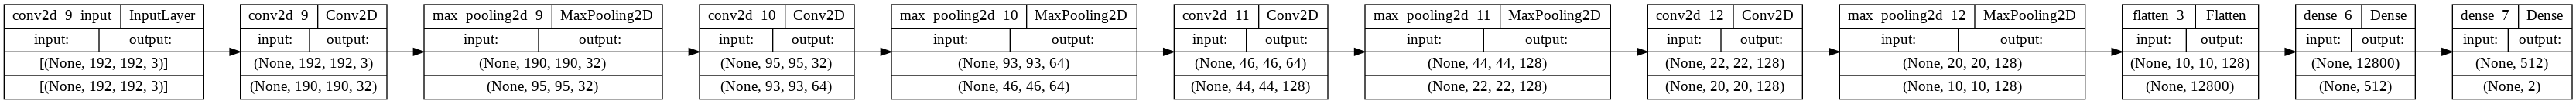

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 95, 95, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 128)     

In [27]:
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [28]:
history = model.fit(
      train_generator,
      steps_per_epoch=6,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[es])

Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 0.7041 - acc: 0.5000 - val_loss: 0.7021 - val_acc: 0.5000
Epoch 2/20
6/6 [==============================] - 14s 3s/step - loss: 0.6985 - acc: 0.4333 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 3/20
6/6 [==============================] - 14s 3s/step - loss: 0.6891 - acc: 0.4833 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 4/20
6/6 [==============================] - 15s 3s/step - loss: 0.6861 - acc: 0.5500 - val_loss: 0.6865 - val_acc: 0.5000
Epoch 5/20
6/6 [==============================] - 15s 3s/step - loss: 0.6755 - acc: 0.5333 - val_loss: 0.6828 - val_acc: 0.5500
Epoch 6/20
6/6 [==============================] - 15s 3s/step - loss: 0.6538 - acc: 0.7667 - val_loss: 0.6775 - val_acc: 0.5000
Epoch 7/20
6/6 [==============================] - 15s 3s/step - loss: 0.6414 - acc: 0.6333 - val_loss: 0.6848 - val_acc: 0.5000
Epoch 8/20
6/6 [==============================] - 15s 3s/step - loss: 0.5981 - acc: 0.7833 - val_loss: 0

In [ ]:
# saving model and history
model.save('/content/drive/MyDrive/statistical deep learning/model_cnn_noaugment.h5')
np.save('/content/drive/MyDrive/statistical deep learning/history_cnn_noaugment.npy',history.history)

In [14]:
# load the model and history
from tensorflow import keras
import numpy as np

model = keras.models.load_model('/content/drive/MyDrive/statistical deep learning/model_cnn_noaugment.h5')
history=np.load('/content/drive/MyDrive/statistical deep learning/history_cnn_noaugment.npy',allow_pickle='TRUE').item()

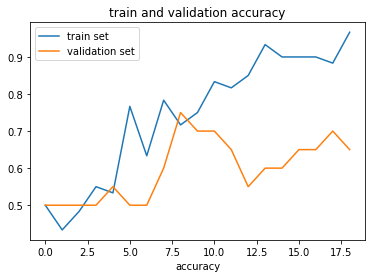

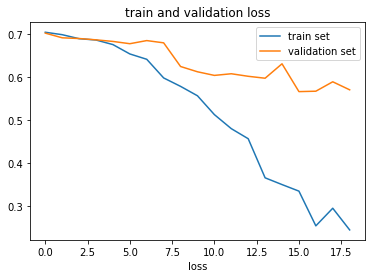

In [15]:
import matplotlib.pyplot as plt

plt.plot(history["acc"], label = "train set")
plt.plot(history["val_acc"], label = "validation set")
plt.xlabel("epoch")
plt.xlabel("accuracy")
plt.title("train and validation accuracy")
plt.legend()
plt.show()

plt.plot(history["loss"], label = "train set")
plt.plot(history["val_loss"], label = "validation set")
plt.xlabel("epoch")
plt.xlabel("loss")
plt.title("train and validation loss")
plt.legend()
plt.show()

### adding data augmentation

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   =0.2,
                                   height_shift_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 192x192
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=10,
        class_mode = "categorical")

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=4,
        class_mode = "categorical")

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [47]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(192, 192, 3)))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 95, 95, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 46, 46, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 22, 22, 128)     

In [48]:
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [49]:
history = model.fit(
      train_generator,
      steps_per_epoch=6,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[es])

Epoch 1/20
6/6 [==============================] - 17s 3s/step - loss: 0.6992 - acc: 0.5667 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 2/20
6/6 [==============================] - 15s 3s/step - loss: 0.6982 - acc: 0.5000 - val_loss: 0.6893 - val_acc: 0.5000
Epoch 3/20
6/6 [==============================] - 15s 3s/step - loss: 0.6999 - acc: 0.4333 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 4/20
6/6 [==============================] - 14s 3s/step - loss: 0.6926 - acc: 0.5000 - val_loss: 0.6889 - val_acc: 0.5500
Epoch 5/20
6/6 [==============================] - 14s 3s/step - loss: 0.7008 - acc: 0.5000 - val_loss: 0.6884 - val_acc: 0.6500
Epoch 6/20
6/6 [==============================] - 15s 3s/step - loss: 0.6957 - acc: 0.5167 - val_loss: 0.6866 - val_acc: 0.7000
Epoch 7/20
6/6 [==============================] - 15s 3s/step - loss: 0.6894 - acc: 0.5333 - val_loss: 0.6840 - val_acc: 0.5500
Epoch 8/20
6/6 [==============================] - 15s 3s/step - loss: 0.6911 - acc: 0.5833 - val_loss: 0

In [50]:
# saving model and history
model.save('/content/drive/MyDrive/statistical deep learning/model_cnn_augment.h5')
np.save('/content/drive/MyDrive/statistical deep learning/history_cnn_augment.npy',history.history)

In [51]:
# load the model and history
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/statistical deep learning/model_cnn_noaugment.h5')
history=np.load('/content/drive/MyDrive/statistical deep learning/history_cnn_noaugment.npy',allow_pickle='TRUE').item()

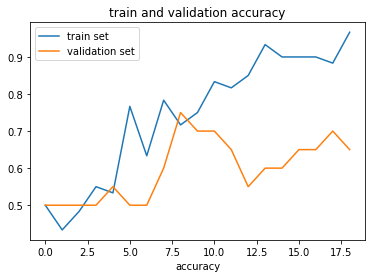

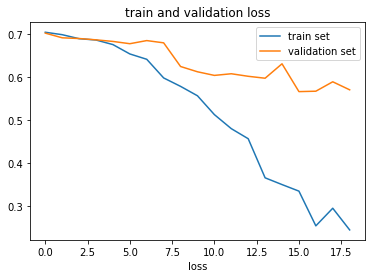

In [52]:
import matplotlib.pyplot as plt

plt.plot(history["acc"], label = "train set")
plt.plot(history["val_acc"], label = "validation set")
plt.xlabel("epoch")
plt.xlabel("accuracy")
plt.title("train and validation accuracy")
plt.legend()
plt.show()

plt.plot(history["loss"], label = "train set")
plt.plot(history["val_loss"], label = "validation set")
plt.xlabel("epoch")
plt.xlabel("loss")
plt.title("train and validation loss")
plt.legend()
plt.show()

### adding transfer learning

In [53]:
import tensorflow as tf

In [72]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 192
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 192x192
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=10,
        class_mode = "categorical")

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=4,
        class_mode = "categorical")

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [73]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 6, 6, 1280)


In [ ]:
base_model.trainable = False
base_model.summary()

In [76]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

In [77]:
# build a new model reusing the pretrained base
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [78]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(learning_rate=1e-4),
#               metrics=['acc'])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [79]:
history = model.fit(
      train_generator,
      steps_per_epoch=6,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[es])

Epoch 1/20
6/6 [==============================] - 27s 4s/step - loss: 0.6553 - accuracy: 0.6500 - val_loss: 0.6392 - val_accuracy: 0.7000
Epoch 2/20
6/6 [==============================] - 18s 3s/step - loss: 0.5258 - accuracy: 0.9000 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 3/20
6/6 [==============================] - 16s 3s/step - loss: 0.4350 - accuracy: 0.9167 - val_loss: 0.4671 - val_accuracy: 0.9000
Epoch 4/20
6/6 [==============================] - 15s 3s/step - loss: 0.3619 - accuracy: 0.9667 - val_loss: 0.4051 - val_accuracy: 0.8500
Epoch 5/20
6/6 [==============================] - 15s 3s/step - loss: 0.3102 - accuracy: 0.9667 - val_loss: 0.3604 - val_accuracy: 0.9000
Epoch 6/20
6/6 [==============================] - 15s 3s/step - loss: 0.2691 - accuracy: 0.9667 - val_loss: 0.3250 - val_accuracy: 0.9000
Epoch 7/20
6/6 [==============================] - 15s 3s/step - loss: 0.2373 - accuracy: 0.9667 - val_loss: 0.2989 - val_accuracy: 0.9000
Epoch 8/20
6/6 [==================

In [80]:
# saving model and history
model.save('/content/drive/MyDrive/statistical deep learning/model_transfer.h5')
np.save('/content/drive/MyDrive/statistical deep learning/history_transfer.npy',history.history)

In [81]:
# load the model and history
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/statistical deep learning/model_transfer.h5')
history=np.load('/content/drive/MyDrive/statistical deep learning/history_transfer.npy',allow_pickle='TRUE').item()

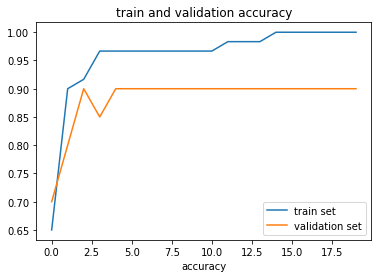

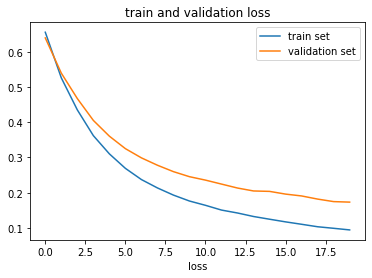

In [82]:
import matplotlib.pyplot as plt

plt.plot(history["accuracy"], label = "train set")
plt.plot(history["val_accuracy"], label = "validation set")
plt.xlabel("epoch")
plt.xlabel("accuracy")
plt.title("train and validation accuracy")
plt.legend()
plt.show()

plt.plot(history["loss"], label = "train set")
plt.plot(history["val_loss"], label = "validation set")
plt.xlabel("epoch")
plt.xlabel("loss")
plt.title("train and validation loss")
plt.legend()
plt.show()

In [86]:
#show three predictions in the validation set
x,y = validation_generator.next()
prediction = model.predict(x)
prediction

array([[9.9844092e-01, 1.5590689e-03],
       [2.5745153e-01, 7.4254841e-01],
       [3.8512037e-04, 9.9961483e-01],
       [9.9654043e-01, 3.4596371e-03]], dtype=float32)

In [87]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 192
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        # All images will be resized to 192x192
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=20,
        class_mode = "categorical")

Found 20 images belonging to 2 classes.


In [95]:
label_map = (test_generator.class_indices)
key_map = {v: k for k, v in label_map.items()}
print(key_map)

{0: 'cookie', 1: 'milky'}


In [92]:
#show three predictions in the validation set
x,y = test_generator.next()
prediction = model.predict(x)
y_pred = prediction.argmax(axis=-1)

[1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0]


In [102]:
print(y_pred)
print([key_map[i] for i in y_pred])

[1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0]
['milky', 'cookie', 'milky', 'cookie', 'cookie', 'milky', 'milky', 'milky', 'cookie', 'cookie', 'cookie', 'cookie', 'cookie', 'cookie', 'milky', 'milky', 'milky', 'cookie', 'milky', 'cookie']


In [105]:
label = y.argmax(axis=-1)
print(label)
print([key_map[i] for i in label])

[1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0]
['milky', 'cookie', 'milky', 'milky', 'cookie', 'milky', 'milky', 'milky', 'cookie', 'cookie', 'cookie', 'cookie', 'cookie', 'cookie', 'milky', 'milky', 'milky', 'cookie', 'milky', 'cookie']


In [106]:
np.mean(label==y_pred)

0.95

The true label is: milky
The prediction label is: milky


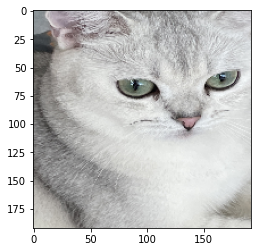

The true label is: cookie
The prediction label is: cookie


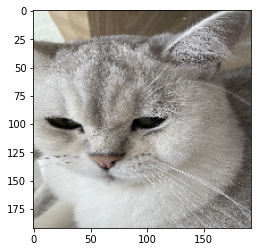

The true label is: milky
The prediction label is: milky


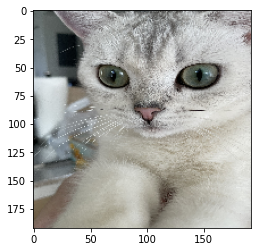

The true label is: milky
The prediction label is: cookie


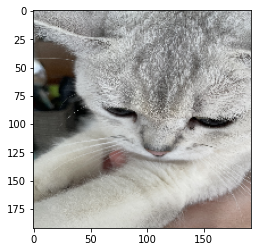

The true label is: cookie
The prediction label is: cookie


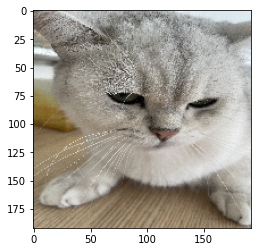

The true label is: milky
The prediction label is: milky


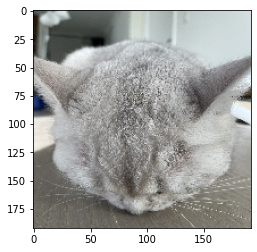

The true label is: milky
The prediction label is: milky


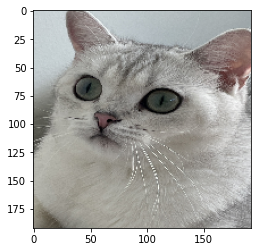

The true label is: milky
The prediction label is: milky


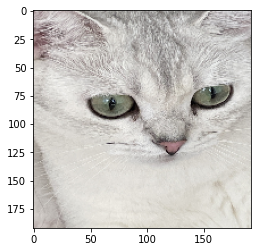

The true label is: cookie
The prediction label is: cookie


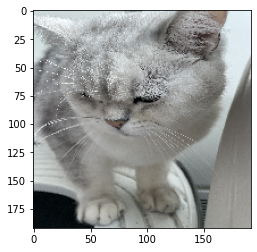

The true label is: cookie
The prediction label is: cookie


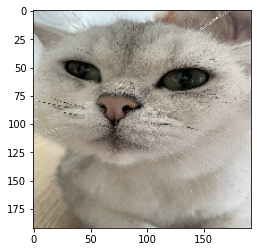

The true label is: cookie
The prediction label is: cookie


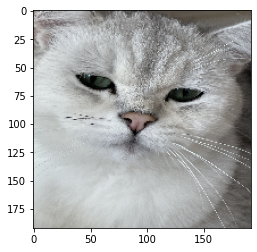

The true label is: cookie
The prediction label is: cookie


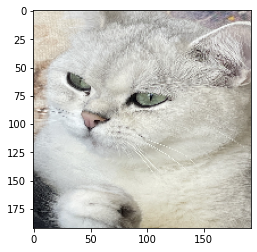

The true label is: cookie
The prediction label is: cookie


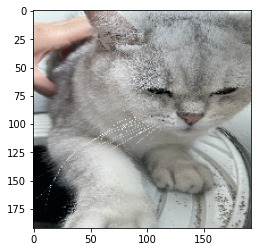

The true label is: cookie
The prediction label is: cookie


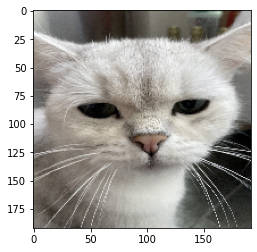

The true label is: milky
The prediction label is: milky


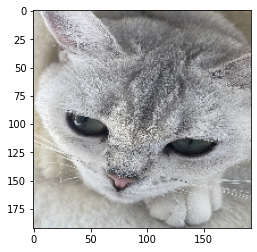

The true label is: milky
The prediction label is: milky


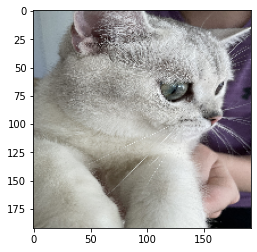

The true label is: milky
The prediction label is: milky


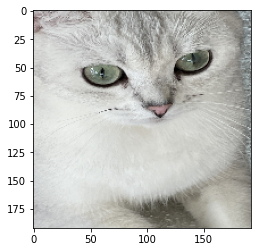

The true label is: cookie
The prediction label is: cookie


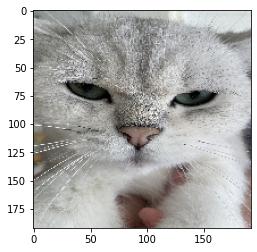

The true label is: milky
The prediction label is: milky


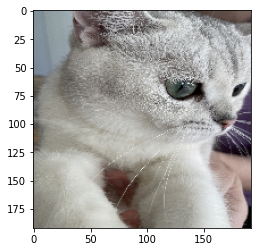

The true label is: cookie
The prediction label is: cookie


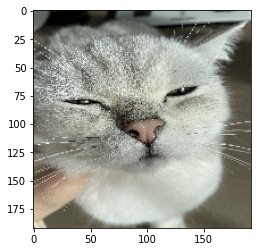

In [113]:
for i in range(0,20):
    image = x[i]
    print('The true label is:', [key_map[i] for i in label][i])
    print('The prediction label is:', [key_map[i] for i in y_pred][i])
    plt.imshow(image)
    plt.show()